In [30]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)

(50000, 32, 32, 3)


In [4]:
# convert 4D array into m x n matrix
adj_x_train = np.zeros((3072,x_train.shape[0]))
for g in range(x_train.shape[0]):
    l = x_train[g]
    for h in range(x_train.shape[3]):
        for j in range(x_train.shape[1]):
            for i in range(x_train.shape[2]):
                adj_x_train[((h*1024) + (j*32) + (i)),g] = l[j, i, h]

In [5]:
print(adj_x_train.T.shape)

(50000, 3072)


In [ ]:
# counts number of zero values in the data
m_dim = adj_x_train.shape[0]
n_dim = adj_x_train.shape[1]
sum_zeros = 0
for i in range(m_dim):
    for j in range(n_dim):
        if (adj_x_train[i,j] == 0):
            sum_zeros = sum_zeros + 1
sparsity_measure = sum_zeros/(m_dim*n_dim)
print('simple sparsity measure:',sparsity_measure)

In [6]:
adj_y_train = np.zeros((y_train.shape[0]))
for k in range(x_train.shape[0]):
    adj_y_train[k] = y_train[k,0]
print(adj_y_train)

[6. 9. 9. ... 9. 1. 1.]


In [7]:
x_normalized = adj_x_train.T/255

In [8]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(x_normalized.shape[1]) ]

df = pd.DataFrame(x_normalized,columns=feat_cols)
df['label'] = adj_y_train
df['label'] = df['label'].apply(lambda i: str(i))

x_normalized, adj_y_train = None, None

print('Size of the dataframe: {}'.format(df.shape))



Size of the dataframe: (50000, 3073)


In [9]:
# creates data frame just for deer and horse class
df2 = (df.loc[(df['label'] == '7.0') | (df['label'] == '4.0')])
# creates data frame just for deer and truck class
df3 = (df.loc[(df['label'] == '4.0') | (df['label'] == '9.0')])
# creates data frame just for living classes
df_living = (df.loc[(df['label'] == '2.0') | (df['label'] == '3.0') | (df['label'] == '4.0') | (df['label'] == '5.0') | (df['label'] == '6.0') | (df['label'] == '7.0')])
# creates data frame just for non-living classes
df_non_living = (df.loc[(df['label'] == '0.0') | (df['label'] == '1.0') | (df['label'] == '8.0') | (df['label'] == '9.0')])

In [10]:
#PCA with all classes
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
rndperm = np.random.permutation(df.shape[0])

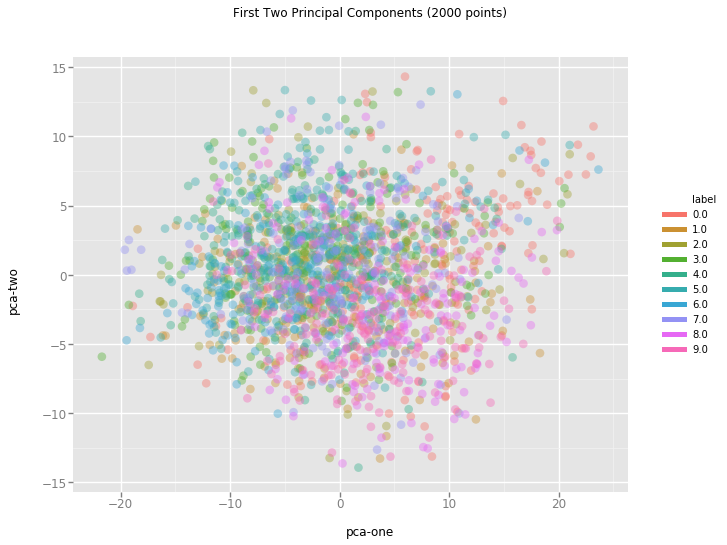

<ggplot: (2990251023)>

In [12]:
from ggplot import *
chart = ggplot(df.loc[rndperm[:2000],:], aes(x='pca-one', y='pca-two', color='label') ) + geom_point(size=75,alpha=0.4) + ggtitle("First Two Principal Components (2000 points)")
chart

In [13]:
#PCA just deer and horse
pca2 = PCA(n_components = 2)
pca_result2 = pca2.fit_transform(df2[feat_cols].values)
df2['pca1'] = pca_result2[:,0]
df2['pca2'] = pca_result2[:,1]

/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


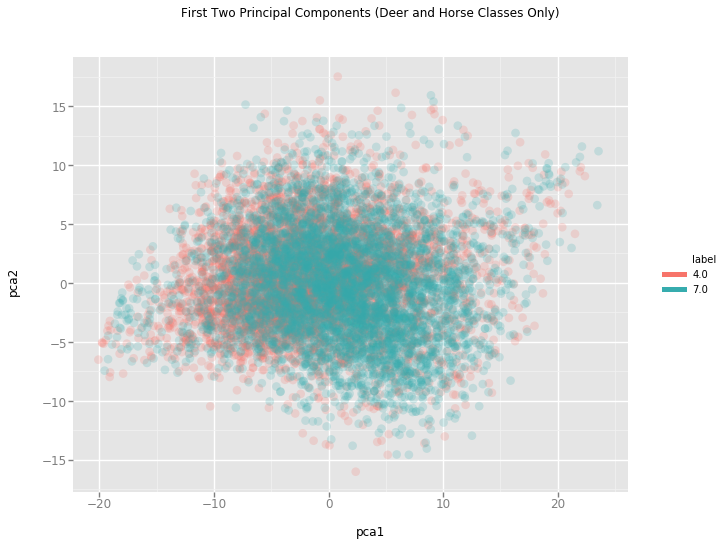

<ggplot: (2990646399)>

In [14]:
chart = ggplot(df2, aes(x='pca1', y='pca2', color = 'label') ) + geom_point(size=75,alpha=0.2) + ggtitle("First Two Principal Components (Deer and Horse Classes Only)")
chart

In [15]:
#PCA just deer and truck
pca3 = PCA(n_components = 2)
pca_result3 = pca3.fit_transform(df3[feat_cols].values)
df3['pca-1'] = pca_result3[:,0]
df3['pca-2'] = pca_result3[:,1]

/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


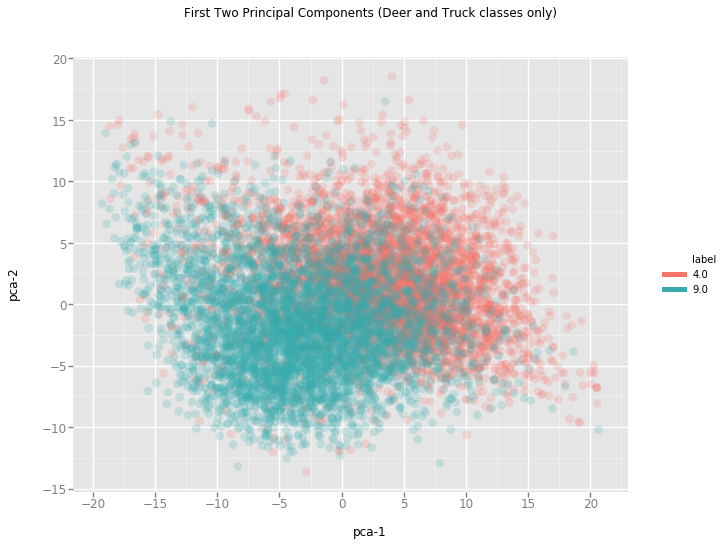

<ggplot: (2990200177)>

In [16]:
chart = ggplot(df3, aes(x='pca-1', y='pca-2', color = 'label') ) + geom_point(size=75,alpha=0.2) + ggtitle("First Two Principal Components (Deer and Truck classes only)")
chart

In [17]:
#PCA just living classes
pca_living = PCA(n_components = 2)
pca_result_4 = pca_living.fit_transform(df_living[feat_cols].values)
df_living['pca_1'] = pca_result_4[:,0]
df_living['pca_2'] = pca_result_4[:,1]

/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


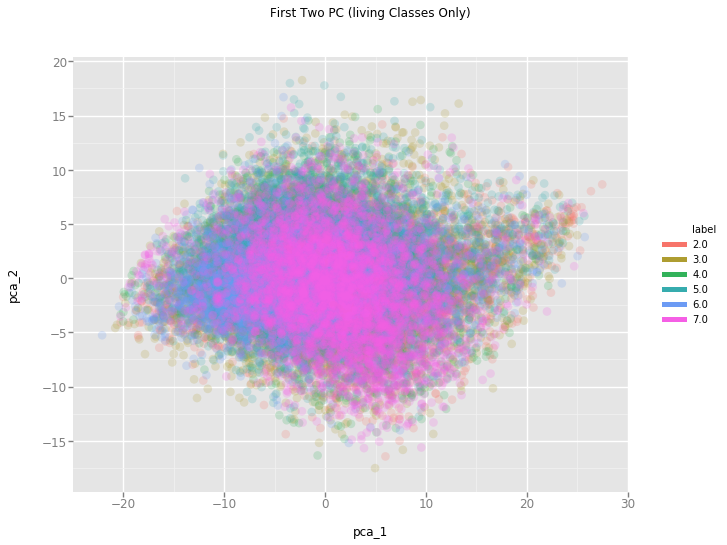

<ggplot: (-9223372033864632071)>

In [18]:
chart = ggplot(df_living, aes(x='pca_1', y='pca_2', color = 'label') ) + geom_point(size=75,alpha=0.2) + ggtitle("First Two PC (living Classes Only)")
chart

In [21]:
#PCA just non-living classes
pca_non_living = PCA(n_components = 2)
pca_result_5 = pca_non_living.fit_transform(df_non_living[feat_cols].values)
df_non_living['pca_1'] = pca_result_5[:,0]
df_non_living['pca_2'] = pca_result_5[:,1]

/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


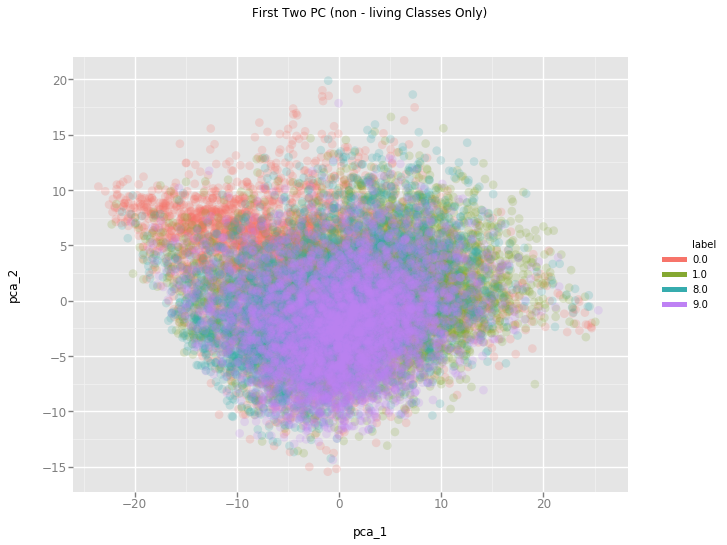

<ggplot: (3091269615)>

In [23]:
chart = ggplot(df_non_living, aes(x='pca_1', y='pca_2', color = 'label') ) + geom_point(size=75,alpha=0.2) + ggtitle("First Two PC (non - living Classes Only)")
chart

In [50]:
from sklearn.decomposition import PCA
pca_15 = PCA(n_components = 250)
pca_result_15 = pca_15.fit_transform(df[feat_cols].values)
X_train_pca = pca_15.transform(df[feat_cols].values)
X_recon_train = X_train_pca.dot(pca_15.components_) + pca_15.mean_
print('finished')

finished


In [51]:
def con_4d(X):
    X_4D = np.zeros((X.shape[0],32,32,3))
    for m in range(X.shape[0]):
        for n in range(X.shape[1]):
            #print(m, int(n/32), n % 32, int(n/1024))
            X_4D[m, (int(n/32) - int(n/1024) * 32),(n % 32), int(n/1024)] = X[m,n]
    return X_4D

In [52]:
x_train_new = con_4d(X_recon_train)
print('finished')

finished


/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


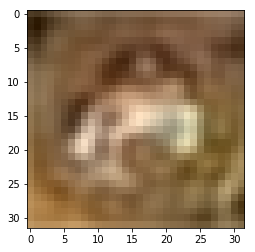

In [53]:
#image reconstructed with 250 components
from matplotlib import pyplot
from scipy.misc import toimage
pyplot.imshow(toimage(x_train_new[0]))


/Users/juandiaz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


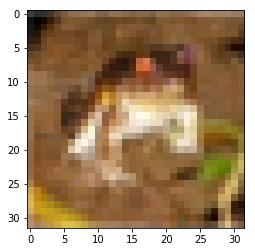

In [42]:
#image reconstructed with all components
pyplot.imshow(toimage(x_train[0]))

In [26]:
pca_15 = PCA(n_components = 15)
pca_result_15 = pca_15.fit_transform(df[feat_cols].values)
print('Explained Variation for 40 columns: {}'.format(np.sum(pca_15.explained_variance_ratio_)))

Explained Variation for 40 columns: 0.7085077354492783


In [ ]:

from matplotlib import pyplot
from scipy.misc import toimage
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(x_train[i]))
# show the plot
pyplot.show()

In [ ]:
pca_40 = PCA(n_components= 40)
pca_result_40 = pca_40.fit_transform(df[feat_cols].values)
print('Explained Variation for 40 columns: {}'.format(np.sum(pca_40.explained_variance_ratio_)))


In [ ]:
import time
from sklearn.manifold import TSNE

pca_40 = PCA(n_components= 40)
pca_result_40 = pca_40.fit_transform(df[feat_cols].values)
print('Explained Variation for 40 columns: {}'.format(np.sum(pca_40.explained_variance_ratio_)))

n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components= 2, verbose= 1, perplexity= 50, n_iter= 350, learning_rate = 150.0)
tsne_pca_results = tsne.fit_transform(pca_result_40[rndperm[:n_sne]])

In [ ]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['tsne_1'] = tsne_pca_results[:,0]
df_tsne['tsne_2'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='tsne_1', y='tsne_2', color='label') ) \
        + geom_point(size=70,alpha=0.4) \
        + ggtitle("tSNE on 40 PCA components")
chart